# Cherry Blossoms!

If we travel back in time a few months, [cherry blossoms](https://en.wikipedia.org/wiki/Cherry_blossom) were in full bloom! We don't live in Japan or DC, but we do have our fair share of the trees - buuut you sadly missed [Brooklyn Botanic Garden's annual festival](https://www.bbg.org/visit/event/sakura_matsuri_2019).

We'll have to make up for it with data-driven cherry blossoms instead. Once upon a time [Data is Plural](https://tinyletter.com/data-is-plural) linked to [a dataset](http://atmenv.envi.osakafu-u.ac.jp/aono/kyophenotemp4/) about when the cherry trees blossom each year. It's a little out of date, but it's quirky in a real nice way so we're sticking with it.

## 0. Do all of your importing/setup stuff

In [32]:
import pandas as pd

%matplotlib inline

## 1. Read in the file using pandas, and look at the first five rows

In [33]:
!ls

Cherry Blossoms.ipynb KyotoFullFlower7.xls


In [34]:
df = pd.read_excel("KyotoFullFlower7.xls", encoding='latin-1')
df.head()

,"Full-flowering dates of Japanese cherry (Prunus jamasakura) at Kyoto, Japan. (Latest version, Jun. 12, 2012)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,This phenological data was acquired by followi...,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Column A; A.D.,NaN,NaN,NaN,NaN,NaN
3,Column B; Full-flowering date (day of year).,NaN,NaN,NaN,NaN,NaN
4,"Column C; Full-flowering date (calender date, ...",NaN,NaN,NaN,NaN,NaN


## 2. Read in the file using pandas CORRECTLY, and look at the first five rows

Hrm, how do your column names look? Read the file in again but this time add a parameter to make sure your columns look right.

**TIP: The first year should be 801 AD, and it should not have any dates or anything.**

In [35]:
df = pd.read_excel("KyotoFullFlower7.xls", encoding='latin-1', skiprows=25)
df.head()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
0,801,NaN,NaN,NaN,NaN,-
1,802,NaN,NaN,NaN,NaN,-
2,803,NaN,NaN,NaN,NaN,-
3,804,NaN,NaN,NaN,NaN,-
4,805,NaN,NaN,NaN,NaN,-


## 3. Look at the final five rows of the data

In [36]:
df.tail()

,AD,Full-flowering date (DOY),Full-flowering date,Source code,Data type code,Reference Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. Add some more NaN values

It looks like you should probably have some NaN/missing values earlier on in the dataset under "Reference name." Read in the file *one more time*, this time making sure all of those missing reference names actually show up as `NaN` instead of `-`.

In [37]:
df = pd.read_excel("KyotoFullFlower7.xls", encoding='latin-1', skiprows=25, na_values=['-', 'NaN'])


In [38]:
df = df.rename(columns={
    'Full-flowering date (DOY)': 'Full_flowering_date_DOY',
    'Full-flowering date': 'Full_flowering_date',
    'Source code': 'Source_code',
    'Data type code': 'Data_type_code',
    'Reference Name': 'Reference_Name'
})
df.tail()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA)


## 4. What source is the most common as a reference?

In [39]:
df.groupby(by='Reference_Name').Source_code.value_counts().sort_values(ascending=False).head()

Reference_Name          Source_code
NEWS-PAPER(ARASHIYAMA)  4.0            44
                        3.0            40
SUGIURAKE-NIKKI         3.0            35
DAIGOJI-ZATSUYO         4.0            21
OYUDONONO-UENO-NIKKI    3.0            19
Name: Source_code, dtype: int64

## 6. Filter the list to only include columns where the `Full-flowering date (DOY)` is not missing

If you'd like to do it in two steps (which might be easier to think through), first figure out how to test whether a column is empty/missing/null/NaN, get the list of `True`/`False` values, and then later feed it to your `df`.

In [40]:
df.Full_flowering_date_DOY.isna()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11      False
12       True
13       True
14      False
15       True
16       True
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
1190    False
1191    False
1192    False
1193    False
1194    False
1195    False
1196    False
1197    False
1198    False
1199    False
1200    False
1201    False
1202    False
1203    False
1204    False
1205    False
1206    False
1207    False
1208    False
1209    False
1210    False
1211    False
1212    False
1213    False
1214    False
Name: Full_flowering_date_DOY, Length: 1215, dtype: bool

In [41]:
df.Full_flowering_date_DOY.dropna()

11       92.0
14      105.0
30       96.0
50      108.0
52      104.0
63      100.0
65      106.0
68       95.0
88      104.0
90      109.0
91      108.0
93      106.0
94      104.0
95      104.0
101     102.0
107      98.0
111      95.0
112     110.0
116      95.0
122     104.0
125      98.0
129      97.0
132     106.0
140     109.0
148     107.0
149      95.0
154      89.0
156     112.0
157     109.0
158      97.0
        ...  
1185    102.0
1186     95.0
1187    106.0
1188     93.0
1189     88.0
1190     97.0
1191     94.0
1192     97.0
1193     99.0
1194     99.0
1195    103.0
1196     97.0
1197     91.0
1198     94.0
1199    100.0
1200     96.0
1201     91.0
1202     98.0
1203     92.0
1204     99.0
1205     98.0
1206     97.0
1207     95.0
1208     95.0
1209     95.0
1210     99.0
1211    101.0
1212     93.0
1213     94.0
1214     93.0
Name: Full_flowering_date_DOY, Length: 827, dtype: float64

## 7. Make a histogram of the full-flowering date

Is it not showing up? Remember the "magic" command that makes graphs show up in matplotlib notebooks!

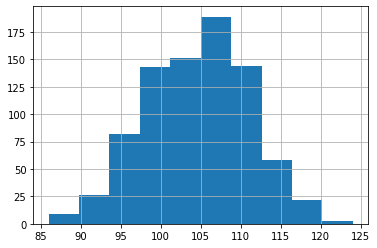

In [42]:
df.Full_flowering_date_DOY.hist()

## 8. Make another histogram of the full-flowering date, but with 39 bins instead of 10

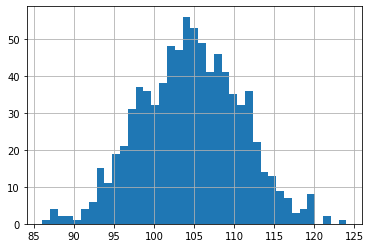

In [43]:
df.Full_flowering_date_DOY.hist(bins=39)

## 9. What's the average number of days it takes for the flowers to blossom? And how many records do we have?

Answer these both with one line of code.

In [44]:
df.Full_flowering_date.describe()

count    827.000000
mean     413.717050
std       12.381731
min      327.000000
25%      410.000000
50%      414.000000
75%      419.000000
max      504.000000
Name: Full_flowering_date, dtype: float64

## 10. What's the average days into the year cherry flowers normally blossomed before 1900?



In [45]:
df[(df.AD <= 1900)].Full_flowering_date_DOY.mean()

105.2027972027972

## 11. How about after 1900?

In [46]:
df[(df.AD >= 1900)].Full_flowering_date_DOY.mean()

100.32743362831859

## 12. How many times was our data from a title in Japanese poetry?

You'll need to read the documentation inside of the Excel file.

In [47]:
df[(df.Data_type_code == 4)].count()

AD                         39
Full_flowering_date_DOY    39
Full_flowering_date        39
Source_code                39
Data_type_code             39
Reference_Name             39
dtype: int64

## 13. Show only the years where our data was from a title in Japanese poetry

In [48]:
df[(df.Data_type_code == 4)].AD

90       891
94       895
95       896
122      923
154      955
168      969
206     1007
232     1033
235     1036
259     1060
260     1061
283     1084
294     1095
381     1182
389     1190
400     1201
415     1216
418     1219
420     1221
422     1223
435     1236
464     1265
467     1268
468     1269
470     1271
488     1289
500     1301
523     1324
529     1330
646     1447
652     1453
653     1454
673     1474
733     1534
791     1592
839     1640
860     1661
1045    1846
1062    1863
Name: AD, dtype: int64

## 14. Graph the full-flowering date (DOY) over time

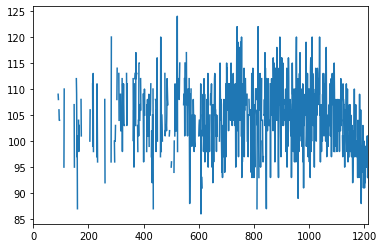

In [49]:
#df.groupby(by='Style').IBUs.median().sort_values(ascending=True).plot(x='Style', y='IBUs', kind='barh')
df.Full_flowering_date_DOY.plot(x='AD', y='Full_flowering_date_DOY')


## 15. Smooth out the graph

It's so jagged! You can use `df.rolling` to calculate a rolling average.

The following code calculates a **10-year mean**, using the `AD` column as the anchor. If there aren't 20 samples to work with in a row, it'll accept down to 5. Neat, right?

(We're only looking at the final 5)

In [50]:
df.rolling(10, on='AD', min_periods=5)['Full_flowering_date_DOY'].mean().tail()

1210    95.9
1211    96.9
1212    96.4
1213    96.6
1214    96.0
Name: Full_flowering_date_DOY, dtype: float64

In [51]:
df['rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full_flowering_date_DOY'].mean()

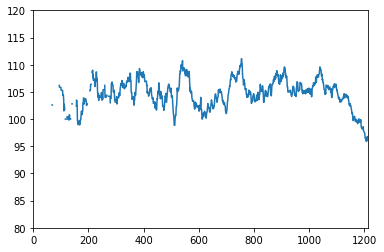

In [52]:
df['rolling_date'] = df.rolling(20, on='AD', min_periods=5)['Full_flowering_date_DOY'].mean().plot(ylim=(80, 120))

Use the code above to create a new column called `rolling_date` in our dataset. It should be the 20-year rolling average of the flowering date. Then plot it, with the year on the x axis and the day of the year on the y axis.

Try adding `ylim=(80, 120)` to your `.plot` command to make things look a little less dire.

### 16. Add a month column

Right now the "Full-flowering date" column is pretty rough. It uses numbers like '402' to mean "April 2nd" and "416" to mean "April 16th." Let's make a column to explain what month it happened in.

* Every row that happened in April should have 'April' in the `month` column.
* Every row that happened in March should have 'March' as the `month` column.
* Every row that happened in May should have 'May' as the `month` column.

**I've given you March as an example**, you just need to add in two more lines to do April and May.

In [53]:
df.loc[(df['Full_flowering_date'] < 400)&(df['Full_flowering_date'] > 300), 'month'] = 'March'

In [54]:
df.loc[(df['Full_flowering_date'] < 500)&(df['Full_flowering_date'] > 400), 'month'] = 'April'

In [55]:
df.loc[(df['Full_flowering_date'] < 600)&(df['Full_flowering_date'] > 500) , 'month'] = 'May'

### 17. Using your new column, how many blossomings happened in each month?

In [56]:
df.month.value_counts()

April    814
March     10
May        3
Name: month, dtype: int64

### 18. Graph how many blossomings happened in each month.

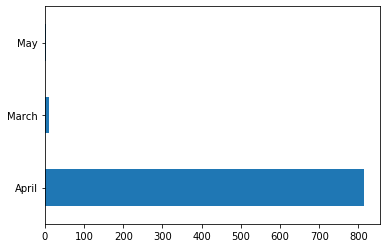

In [57]:
df.month.value_counts().plot(x='month', y='value_counts()', kind='barh')

## 19. Adding a day-of-month column

Now we're going to add a new column called "day of month." It's actually a little tougher than it should be since the `Full-flowering date` column is a *float* instead of an integer.

And if you try to convert it to an int, **pandas yells at you!**

That's because, as you can read, you can't have an `NaN` be an integer. But, for some reason, it *can* be a float. Ugh! So what we'll do is **drop all of the na values, then convert them to integers to get rid of the decimals.**

I'll show you the first 5 here.

In [58]:
df['Full_flowering_date'].dropna().astype(int).head()

11    401
14    415
30    406
50    418
52    414
Name: Full_flowering_date, dtype: int64

On the next line, I take the first character of the row and add a bunch of exclamation points on it. I want you to edit this code to **return the last TWO digits of the number**. This only shows you the first 5, by the way.

You might want to look up 'list slicing.'

In [59]:
df['Full_flowering_date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:])

11      01
14      15
30      06
50      18
52      14
63      09
65      16
68      05
88      14
90      19
91      17
93      16
94      14
95      13
101     12
107     07
111     04
112     20
116     05
122     14
125     08
129     07
132     16
140     19
148     17
149     05
154     30
156     22
157     19
158     07
        ..
1185    12
1186    05
1187    15
1188    03
1189    29
1190    07
1191    03
1192    07
1193    09
1194    09
1195    12
1196    07
1197    01
1198    04
1199    09
1200    06
1201    01
1202    08
1203    01
1204    09
1205    08
1206    07
1207    04
1208    05
1209    05
1210    09
1211    10
1212    03
1213    04
1214    03
Name: Full_flowering_date, Length: 827, dtype: object

Now that you've successfully extracted the last two letters, save them into a new column called `'day-of-month'`

In [60]:
df['day_of_month'] = df['Full_flowering_date'].dropna().astype(int).astype(str).apply(lambda value: value[-2:])


In [61]:
df.tail()

,AD,Full_flowering_date_DOY,Full_flowering_date,Source_code,Data_type_code,Reference_Name,rolling_date,month,day_of_month
1210,2011,99.0,409.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),"AxesSubplot(0.125,0.125;0.775x0.755)",April,09
1211,2012,101.0,410.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),"AxesSubplot(0.125,0.125;0.775x0.755)",April,10
1212,2013,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),"AxesSubplot(0.125,0.125;0.775x0.755)",April,03
1213,2014,94.0,404.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),"AxesSubplot(0.125,0.125;0.775x0.755)",April,04
1214,2015,93.0,403.0,8.0,0.0,NEWS-PAPER(ARASHIYAMA),"AxesSubplot(0.125,0.125;0.775x0.755)",April,03


### 20. Adding a date column

Now take the `'month'` and `'day-of-month'` columns and combine them in order to create a new column called `'date'`

In [62]:
df['date'] = df['day_of_month'] + df['month']

# YOU ARE DONE.

And **incredible.**